# **7.9 XGBOOST:**


In [1]:
!pip install xgboost

                                              0.0/70.9 MB ? eta -:--:--
                                              0.0/70.9 MB ? eta -:--:--
                                             0.0/70.9 MB 325.1 kB/s eta 0:03:39
                                             0.1/70.9 MB 409.6 kB/s eta 0:02:54
                                             0.2/70.9 MB 913.1 kB/s eta 0:01:18
                                             0.2/70.9 MB 913.1 kB/s eta 0:01:18
                                              0.3/70.9 MB 1.2 MB/s eta 0:01:02
                                              0.7/70.9 MB 2.3 MB/s eta 0:00:31
                                              1.3/70.9 MB 3.5 MB/s eta 0:00:20
     -                                        1.8/70.9 MB 4.5 MB/s eta 0:00:16
     -                                        2.6/70.9 MB 5.7 MB/s eta 0:00:12
     -                                        3.0/70.9 MB 5.9 MB/s eta 0:00:12
     -                                        3.3/70.9 MB 6.4 

In [1]:
import xgboost as xgb
import sklearn
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

## 1 - **Ensemble Learning**

<font size = 5> 

El **ENSEMBLE LEARNING** es una metodología general que consiste en combinar los resultados de diferentes modelos.

Existen una práctica infinidad de metodologías de combinación posible. Sin embargo las tres metodologías principales existentes son **BAGGING**, **STACKING** y **BOOSTING**

### **A-BAGGING:**

<font size = 5> 

El **BAGGING** es una metodología simple que consiste en generar varios modelos, normalmente árboles de decisión, y tomar alguna métrica o metodo de decisión para 'unir' los resultados de cada modelo.

<center><img src="./imgs/Bagging-Ensemble.png">

<font size = 5> 

Cada modelo está entrenado con datos diferentes, subconjuntos del dataset original.

Suele utilizarse el mismo algoritmo para todos los modelos: Decission Trees

Se utlizan mecanismos de voto o medias para agregar los resultados.

¿Qué algoritmo ya visto reune estas características?


### **B-STACKING:**

<font size = 5> 

El **STACKING** es una metodología que consiste en generar distintos modelos usando diferentes algoritmos entrenados en todo el dataset para, posteriormente, utilizar otro modelo que reciba como input los outputs del los modelos iniciales.

Los modelos iniciales son conocidos como modelos de nivel 0 y el restante como modelo de nivel 1.

<center><img src="./imgs/Stacking-Ensemble.png">

<font size = 5> 

Por tanto, a diferencia del método anterior:

* Los modelos se entrenan sobre todo el dataset, no sobre versiones fragmentadas.
* Los modelos usan diferentes algoritmos.
* La decisión final también la toma un algoritmo de machine learning.

Esto permite potencialmente capturar relaciones más complejas que con el método anterior si los modelos son suficientemente variados.

### **C-BOOSTING:**

<font size = 5> 

El **BOOSTING** es una metodología que cambia el enfoque para poner cada vez mayor atención en aquellos casos en los que los modelos previos han fallado.

Cada modelo se añade de tal manera que intenta corregir los errores de las predicciones del modelo anterior. 

Habitualmente los modelos utilizados son árboles de decisión sencillos (a los que se ha permitido tener poca profundidad). La clave reside en que cada modelo va a recibir para entrenar todo el dataset, pero va a dar más importancia a aquellos casos en los que el anterior modelo haya fallado.

<center><img src="./imgs/Boosting-Ensemble.png">

<font size = 5> 
Por lo tanto de esta metodología podemos decir que:

* Es Secuencial: los modelos de entrenan de manera secuencial dado que necesitan saber los casos de fallo de los modelos anteriores.
* Dataset con sesgo hacia los fallos: Siempre utilizan todo el dataset, dando mayor importancia a los casos de error.
* El resultado final viene de la combinación de los modelos usando medias ponderadas en las que los modelos mas efectivos toman mayor peso.

## 2 - **XGBOOST**

<font size = 5> 
Extreme Gradient Boosting es uno de los algoritmos más potentes y eficientes utilizados en machine learning y, como su propio nombre indica, pertener al grupo de BOOSTING de las metodologías vistas anteriormente.

Es un algoritmo altamente optimizado que sirve para tareas de clasificación y regresión.

Los motivos más potentes para su éxito son:
* Es muy eficiente, pudiendo manejar con facilidad grandes datasets.
* Permite utilizarse tanto en regresión como en clasificación.
* Incorpora parámetros de regularización (L1 y L1). Estos parámetros permiten prevenir el overfitting.
* Permite observar la importancia de las características en la toma de decisiones


In [2]:
# Definicion basica de modelo:
xgb_model = xgb.XGBRegressor(reg_alpha=0.1, reg_lambda=0.1, n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42)

#### **Parámetros:**

In [3]:
xgb_model.get_params()

{'objective': 'reg:squarederror',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': 0.1,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': 5,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': 42,
 'reg_alpha': 0.1,
 'reg_lambda': 0.1,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

<font size = 5> 
Como podemos observar, el número de parámetros es alto. Revisamos los más relevantes:

**Parámetros Generales**: https://xgboost.readthedocs.io/en/stable/parameter.html 
* **booster** : Selecciona entre gbtree, dart o gblinear. Los dos primeros usan árboles de decisión y el último utiliza funciones lineales. Por norma general los árboles funcionan significativamente mejor.
* **verbosity** : Indica la cantidad de información que el modelo nos lanza por pantalla según realiza acciones. 0 (silent), 1 (warning), 2 (info), 3 (debug)

**Parámetros de Árboles**:
* **n_estimators** : número de árboles que serán iniciados. Por defecto tiene un valor de 100.
* **subsample** : ratio de los datos que será utilizado en el entrenamiento, por defecto vale 1.
* **learning_rate** (eta): parámetro que modifica los pesos de las características encontradas por el modelo en cada paso para intentar optimizar sus valores. Por defecto vale 0.3, pero puede variar enormemente con cada problema.
* **gamma** : parámetro que indica la mejora mínima de precisión que tiene que conseguir un arbol para ser utilizado. Por defecto está en 0.
* **max_depth** : limita cómo de profundo puede ser un arbol, su valor por defecto es 6.
* **reg_alpha** y **reg_lambda**: regularización L1 (alpha) y L2(lambda). Estas métricas introducen aspectos que varían las funciones de coste y sirven para reducir el overfitting.
* **min_split_loss** : factor de regularización aplicado a la creación de los árboles, haciéndolos más conservadores. Por defecto vale 0.
* **scale_pos_weight**: Parámetro para mejorar el equilibrio de los casos positivos y negativos (en problemas de clasificación). El valor típico que se suele introducir es n_negativo/n_positivos. Por defecto se sitúa en 1.


In [4]:
import numpy as np

from scipy.stats import uniform, randint

from sklearn.datasets import load_breast_cancer, load_diabetes, load_wine
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split
from sklearn.metrics import ConfusionMatrixDisplay

import xgboost as xgb

**Funciones de report de resultados**

In [5]:
def display_scores(scores):
    print(f"Scores: {scores}\n",
          f"Media: {np.mean(scores)}\n",
          f"Std: {np.std(scores)}")

In [6]:
def report_best_scores(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

#### **REGRESIÓN:**

In [9]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [8]:
# Cargamos los datos:
diabetes = load_diabetes()

X = diabetes.data
y = diabetes.target

# Mostramos los datos:
pd.DataFrame(X, columns=diabetes.feature_names).head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [10]:
# Definimos el modelo:
xgb_model = xgb.XGBRegressor(random_state=42)

xgb_model.fit(X, y)

y_pred = xgb_model.predict(X)

mse=mean_squared_error(y, y_pred)

print(np.sqrt(mse))

0.2401475171547707


In [11]:
# Comparación con Support Vector Regression:
from sklearn.svm import SVR
svr_model = SVR()
svr_model.fit(X, y)
y_pred = svr_model.predict(X)
mse=mean_squared_error(y, y_pred)
print(np.sqrt(mse))

68.56635299263624


In [14]:
# Ahora lo intentamos con regresión logistica:
from sklearn.linear_model import LogisticRegression
# Fit
model = LogisticRegression()
model.fit(X, y)

# Predict
y_pred = model.predict(X)

mse=mean_squared_error(y, y_pred)
print(np.sqrt(mse))



69.19722289303667


#### **CLASIFICACIÓN BINARIA**

In [17]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

1.0


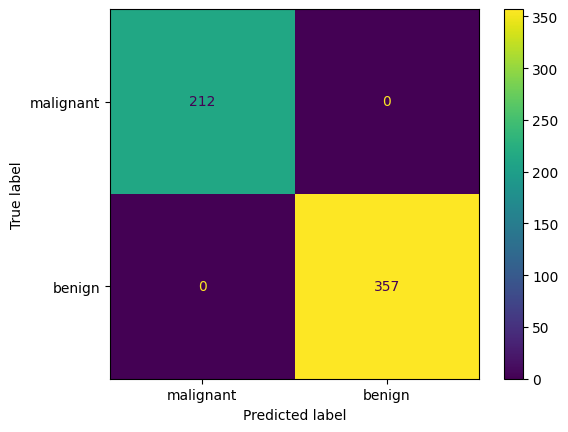

In [16]:
cancer = load_breast_cancer()

X = cancer.data
y = cancer.target

xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X, y)

y_pred = xgb_model.predict(X)

# Metricas:
print(accuracy_score(y, y_pred))
# Mostramos la matriz de confusion:
ConfusionMatrixDisplay(confusion_matrix(y, y_pred),
                       display_labels=cancer.target_names).plot();

0.9226713532513181


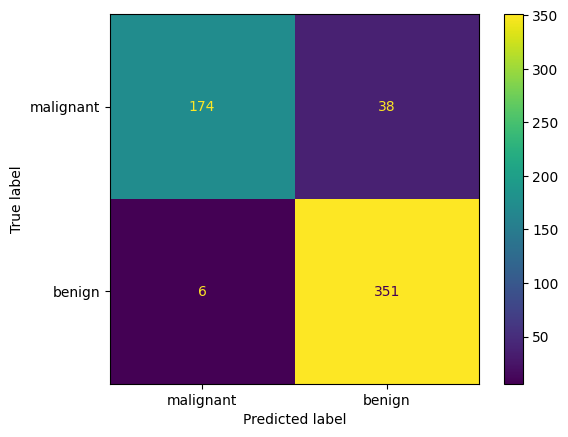

In [18]:
# Comparamos con un SVC:
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(X, y)
y_pred = svc_model.predict(X)
print(accuracy_score(y, y_pred))
ConfusionMatrixDisplay(confusion_matrix(y, y_pred),
                       display_labels=cancer.target_names).plot();

#### **CLASIFICACIÓN MULTICLASE**

1.0


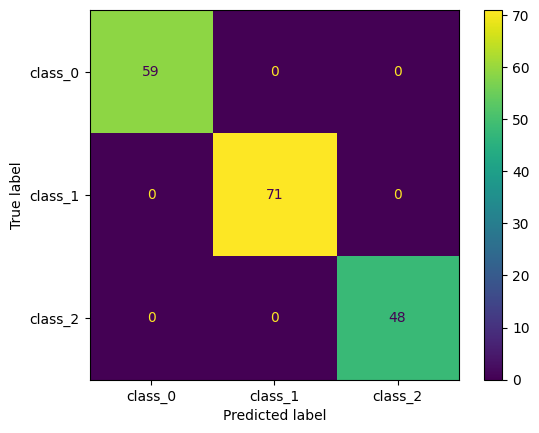

In [19]:
wine = load_wine()

X = wine.data
y = wine.target

xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X, y)

y_pred = xgb_model.predict(X)

print(accuracy_score(y, y_pred))
ConfusionMatrixDisplay(confusion_matrix(y, y_pred),
                       display_labels=wine.target_names).plot();

0.7865168539325843


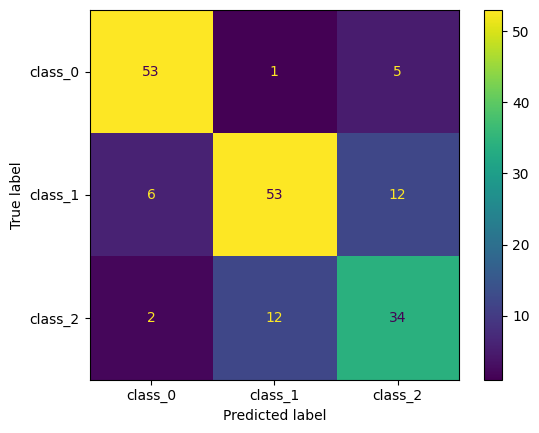

In [20]:
# Comparamos con un KNN:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
knn_model.fit(X, y)
y_pred = knn_model.predict(X)
print(accuracy_score(y, y_pred))
ConfusionMatrixDisplay(confusion_matrix(y, y_pred),
                       display_labels=wine.target_names).plot();

#### **CROSS VALIDATION**

**KFOLD**

In [21]:
# Cross validation con KFold consiste en dividir el conjunto de datos en 
# pliegues (folds) de tamaño similar y realizar k iteraciones de entrenamiento.
# En cada iteración, se selecciona un pliegue diferente como conjunto de
# validación y los restantes se utilizan como conjunto de entrenamiento.
# El resultado de la validación cruzada es el promedio de los resultados de
# cada iteración.
diabetes = load_diabetes()

X = diabetes.data
y = diabetes.target

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

scores = []

for train_index, test_index in kfold.split(X):   
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    xgb_model = xgb.XGBRegressor()
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(mean_squared_error(y_test, y_pred))
    
display_scores(np.sqrt(scores))

Scores: [63.93059871 61.44356415 67.49238017 69.51815605 59.9786771 ]
 Media: 64.47267523572174
 Std: 3.5844350918480674


**CROSS_VALIDATION**

In [22]:
# Cross val score es una funcion que nos permite hacer cross validation
# de una manera mas sencilla. Lo que hace es dividir el conjunto de datos
# en k pliegues (folds) de tamaño similar y realizar k iteraciones de
# entrenamiento. En cada iteración, se selecciona un pliegue diferente como
# conjunto de validación y los restantes se utilizan como conjunto de
# entrenamiento. El resultado de la validación cruzada es el promedio de los
# resultados de cada iteración.
xgb_model = xgb.XGBRegressor(random_state=42)

scores = cross_val_score(xgb_model, X, y, scoring="neg_mean_squared_error", cv=5)

display_scores(np.sqrt(-scores))

Scores: [62.80101886 65.78389959 62.21211593 66.40836809 67.3001013 ]
 Media: 64.90110075482491
 Std: 2.0222450683442146


#### **HIPERPARÁMETROS**

In [47]:
diabetes = load_diabetes()

X = diabetes.data
y = diabetes.target

xgb_model = xgb.XGBRegressor(random_state=42)

params = {
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.03, 0.3),
    "max_depth": randint(2, 7),
    "n_estimators": randint(100, 150), # default 100
    "reg_alpha": uniform(0, 0.5),
    "reg_lambda": uniform(0, 0.5),
}

search = RandomizedSearchCV(xgb_model, param_distributions=params, random_state=42, n_iter=1000, cv=3, verbose=1, n_jobs=-1, return_train_score=True)

search.fit(X, y)

report_best_scores(search.cv_results_, 1)

Fitting 3 folds for each of 1000 candidates, totalling 3000 fits
Model with rank: 1
Mean validation score: 0.454 (std: 0.004)
Parameters: {'gamma': 0.21431527348523788, 'learning_rate': 0.07228788825653078, 'max_depth': 2, 'n_estimators': 101, 'reg_alpha': 0.04878125511964987, 'reg_lambda': 0.43099345420213614}



In [48]:
# Medimos el mejor modelo:
mejor = search
# Error cuadratico medio:
mse=mean_squared_error(y, mejor.predict(X))
print(np.sqrt(mse))

44.93970431611461


In [50]:
xgb_model = xgb.XGBRegressor()
xgb_model.fit(X, y)
mse=mean_squared_error(y, xgb_model.predict(X))
print(np.sqrt(mse))

0.2401475171547707


#### **EARLY STOPPING**

[0]	validation_0-auc:0.96348
[1]	validation_0-auc:0.97201
[2]	validation_0-auc:0.97035
[3]	validation_0-auc:0.97930
[4]	validation_0-auc:0.97857
[5]	validation_0-auc:0.97784
[6]	validation_0-auc:0.98408
[7]	validation_0-auc:0.98450
[8]	validation_0-auc:0.98616
[9]	validation_0-auc:0.99105
[10]	validation_0-auc:0.99126
[11]	validation_0-auc:0.99064
[12]	validation_0-auc:0.99147
[13]	validation_0-auc:0.99209
[14]	validation_0-auc:0.99209
[15]	validation_0-auc:0.99147
[16]	validation_0-auc:0.99168
[17]	validation_0-auc:0.99126
[18]	validation_0-auc:0.99189
[19]	validation_0-auc:0.99168
[20]	validation_0-auc:0.99168
[21]	validation_0-auc:0.99168
[22]	validation_0-auc:0.99168
[23]	validation_0-auc:0.99147
[24]	validation_0-auc:0.99084
[25]	validation_0-auc:0.99084
[26]	validation_0-auc:0.99189
[27]	validation_0-auc:0.99230
[28]	validation_0-auc:0.99168
[29]	validation_0-auc:0.99230
[30]	validation_0-auc:0.99189
[31]	validation_0-auc:0.99189
[32]	validation_0-auc:0.99168
[33]	validation_0-au

[53]	validation_0-auc:0.99230
[54]	validation_0-auc:0.99230
[55]	validation_0-auc:0.99230
[56]	validation_0-auc:0.99209
[57]	validation_0-auc:0.99230


0.958041958041958

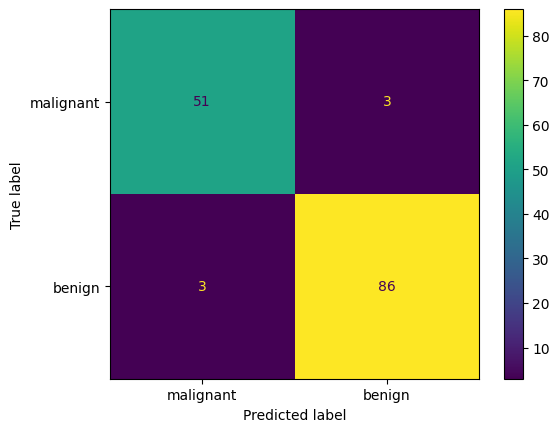

In [26]:
cancer = load_breast_cancer()

X = cancer.data
y = cancer.target

# if more than one evaluation metric are given the last one is used for early stopping
xgb_model = xgb.XGBClassifier(random_state=42,
                              eval_metric="auc",
                              early_stopping_rounds=15)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

xgb_model.fit(X_train, y_train, eval_set=[(X_test, y_test)])

y_pred = xgb_model.predict(X_test)

# Display confusion matrix:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred),
                          display_labels=cancer.target_names).plot();
accuracy_score(y_test, y_pred)

In [27]:
print("best score: {0}, best iteration: {1}, best ntree limit {2}".format(xgb_model.best_score, xgb_model.best_iteration, xgb_model.best_ntree_limit))

best score: 0.9929255097794424, best iteration: 43, best ntree limit 44


In [28]:
cancer = load_breast_cancer()

X = cancer.data
y = cancer.target

xgb_model = xgb.XGBClassifier(objective="binary:logistic", n_estimators=20, random_state=42, eval_metric=["auc", "error", "error@0.6"])

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

xgb_model.fit(X_train, y_train, eval_set=[(X_test, y_test)])

y_pred = xgb_model.predict(X_test)

[0]	validation_0-auc:0.96348	validation_0-error:0.04895	validation_0-error@0.6:0.07692
[1]	validation_0-auc:0.97201	validation_0-error:0.04895	validation_0-error@0.6:0.06294
[2]	validation_0-auc:0.97035	validation_0-error:0.04196	validation_0-error@0.6:0.05594
[3]	validation_0-auc:0.97930	validation_0-error:0.04196	validation_0-error@0.6:0.06294
[4]	validation_0-auc:0.97857	validation_0-error:0.03497	validation_0-error@0.6:0.04895
[5]	validation_0-auc:0.97784	validation_0-error:0.04196	validation_0-error@0.6:0.04196
[6]	validation_0-auc:0.98408	validation_0-error:0.03497	validation_0-error@0.6:0.04895
[7]	validation_0-auc:0.98450	validation_0-error:0.04895	validation_0-error@0.6:0.04196
[8]	validation_0-auc:0.98616	validation_0-error:0.04895	validation_0-error@0.6:0.04895
[9]	validation_0-auc:0.99105	validation_0-error:0.04895	validation_0-error@0.6:0.04196
[10]	validation_0-auc:0.99126	validation_0-error:0.04895	validation_0-error@0.6:0.04196
[11]	validation_0-auc:0.99064	validation_0

### **MÉTRICAS**:

In [86]:
cancer = load_breast_cancer()

X = cancer.data
y = cancer.target

xgb_model = xgb.XGBClassifier(n_estimators=200 ,random_state=42, eval_metric=["auc","error", "logloss"])

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

xgb_model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], verbose=False)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=['auc', 'error', 'logloss'],
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=42, ...)

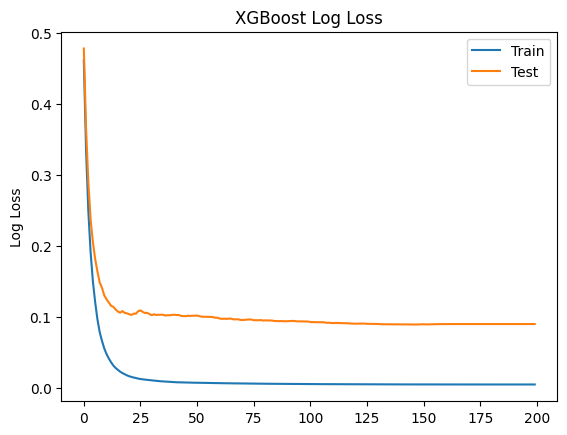

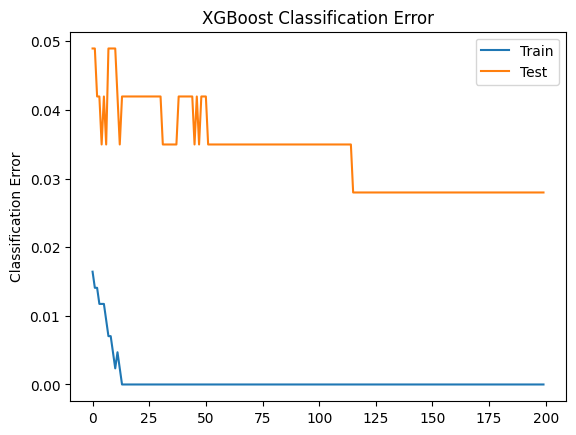

In [87]:
# Performance:
results = xgb_model.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)
# LOG LOSS
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
ax.legend()
plt.ylabel('Log Loss')
plt.title('XGBoost Log Loss')
plt.show()
# ERROR DE CLASIFICACION
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['error'], label='Train')
ax.plot(x_axis, results['validation_1']['error'], label='Test')
ax.legend()
plt.ylabel('Classification Error')
plt.title('XGBoost Classification Error')
plt.show()

**Importancia de los indicadores:**

In [30]:
xgb_model.feature_importances_

array([0.0000000e+00, 1.7205674e-02, 0.0000000e+00, 1.7759528e-02,
       3.3183466e-03, 3.9389562e-03, 2.8331226e-03, 4.0366501e-01,
       3.8107880e-04, 7.0252293e-03, 2.3155283e-02, 1.0934258e-02,
       1.8047949e-02, 1.0090082e-02, 3.5266601e-03, 3.5956448e-03,
       1.3324991e-02, 1.0532974e-03, 2.1894288e-03, 2.0844929e-02,
       6.6993743e-02, 2.9081590e-02, 1.9295705e-02, 4.5089513e-02,
       5.8505135e-03, 0.0000000e+00, 1.7125871e-02, 2.5183415e-01,
       1.8394599e-03, 0.0000000e+00], dtype=float32)

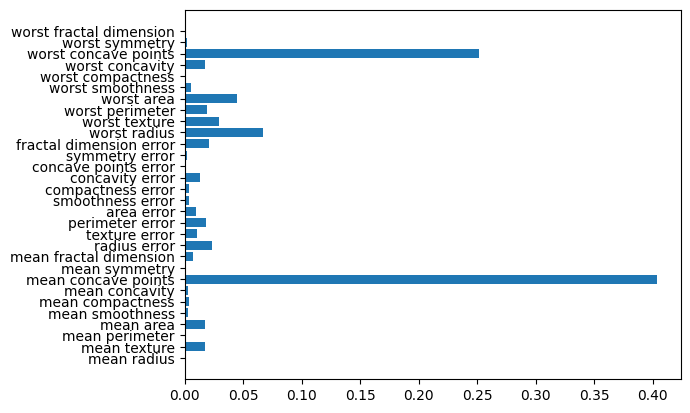

In [31]:
plt.barh(cancer.feature_names, xgb_model.feature_importances_);

Text(0.5, 0, 'Xgboost Feature Importance')

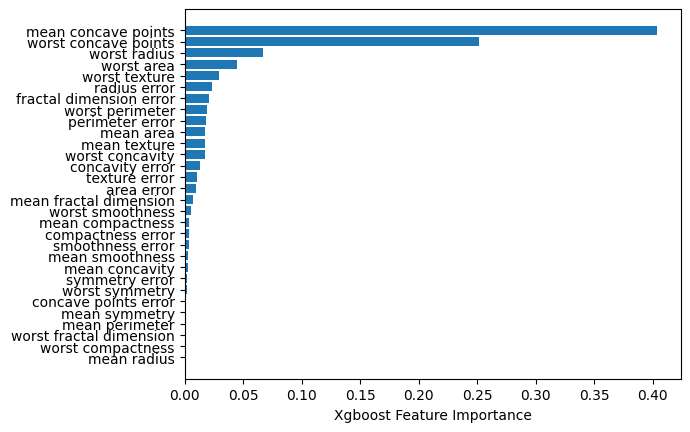

In [32]:
sorted_idx = xgb_model.feature_importances_.argsort()
plt.barh(cancer.feature_names[sorted_idx], xgb_model.feature_importances_[sorted_idx])
plt.xlabel("Xgboost Feature Importance")

In [33]:
# Permutation importance:
from sklearn.inspection import permutation_importance
permutation_importance = permutation_importance(xgb_model, X_test, y_test, n_repeats=50, random_state=42)

<BarContainer object of 30 artists>

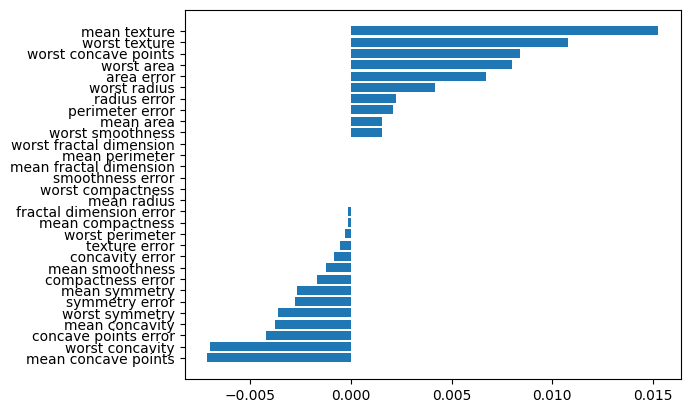

In [34]:
sorted_idx = permutation_importance.importances_mean.argsort()
plt.barh(cancer.feature_names[sorted_idx],
         permutation_importance.importances_mean[sorted_idx])

In [44]:
x_train_ordered = pd.DataFrame(X_train, columns=cancer.feature_names)[cancer.feature_names[sorted_idx]]

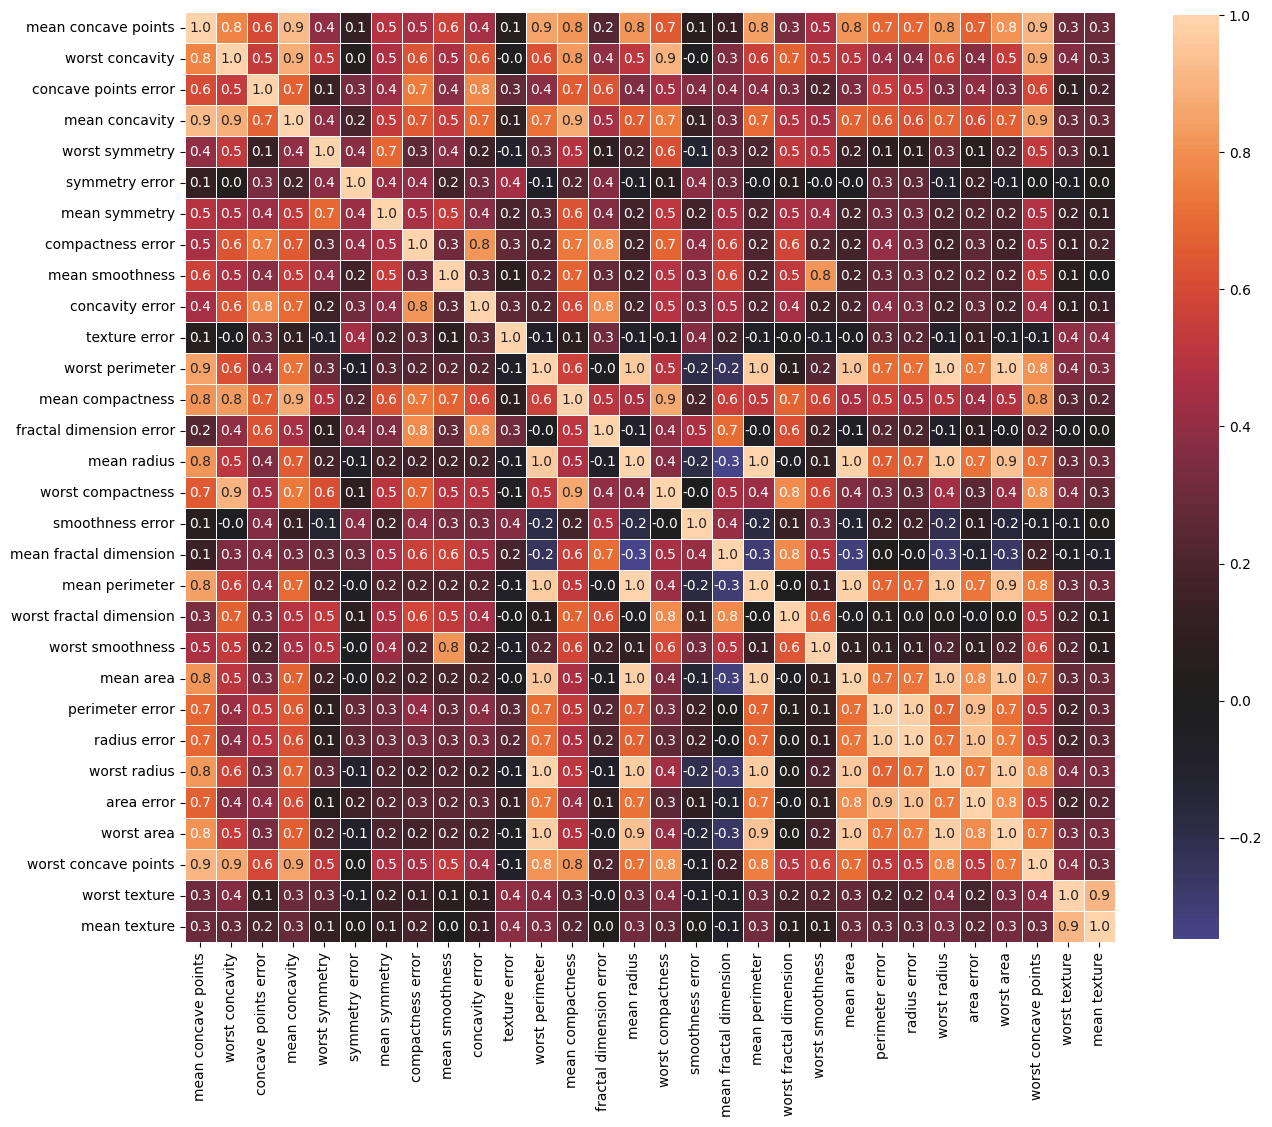

In [77]:
import seaborn as sns
def correlation_heatmap(train):
    correlations = train.corr()

    fig, ax = plt.subplots(figsize=(15,15))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.1f', square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .80})
    plt.show();
    
correlation_heatmap(x_train_ordered)

In [51]:
!pip install shap

                                              0.0/462.3 kB ? eta -:--:--
                                              10.2/462.3 kB ? eta -:--:--
     --                                    30.7/462.3 kB 445.2 kB/s eta 0:00:01
     -------                               92.2/462.3 kB 880.9 kB/s eta 0:00:01
     -------------------------------------- 462.3/462.3 kB 3.2 MB/s eta 0:00:00
                                              0.0/2.5 MB ? eta -:--:--
     -----------------------                  1.5/2.5 MB 30.9 MB/s eta 0:00:01
     ---------------------------------------- 2.5/2.5 MB 32.4 MB/s eta 0:00:00
  Using cached cloudpickle-2.2.1-py3-none-any.whl (25 kB)
                                              0.0/27.7 MB ? eta -:--:--
     -                                        1.0/27.7 MB 68.9 MB/s eta 0:00:01
     ---                                      2.4/27.7 MB 30.9 MB/s eta 0:00:01
     ------                                   4.7/27.7 MB 37.8 MB/s eta 0:00:01
     ---------

In [53]:
# update jupyter and ipywidgets
!pip install -U jupyter ipywidgets

  Using cached jupyter-1.0.0-py2.py3-none-any.whl (2.7 kB)
                                              0.0/139.3 kB ? eta -:--:--
                                              0.0/139.3 kB ? eta -:--:--
     --------                              30.7/139.3 kB 660.6 kB/s eta 0:00:01
     ----------                            41.0/139.3 kB 487.6 kB/s eta 0:00:01
     -------------------------------------- 139.3/139.3 kB 1.0 MB/s eta 0:00:00
                                              0.0/4.0 MB ? eta -:--:--
     -------------                            1.4/4.0 MB 28.5 MB/s eta 0:00:01
     ---------------------------              2.7/4.0 MB 29.1 MB/s eta 0:00:01
     ---------------------------------------- 4.0/4.0 MB 28.6 MB/s eta 0:00:00
                                              0.0/121.9 kB ? eta -:--:--
     -------------------------------------- 121.9/121.9 kB 7.0 MB/s eta 0:00:00
                                              0.0/254.9 kB ? eta -:--:--
     ----------------

In [68]:
import shap
dataX = pd.DataFrame(X, columns=cancer.feature_names)
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(dataX)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


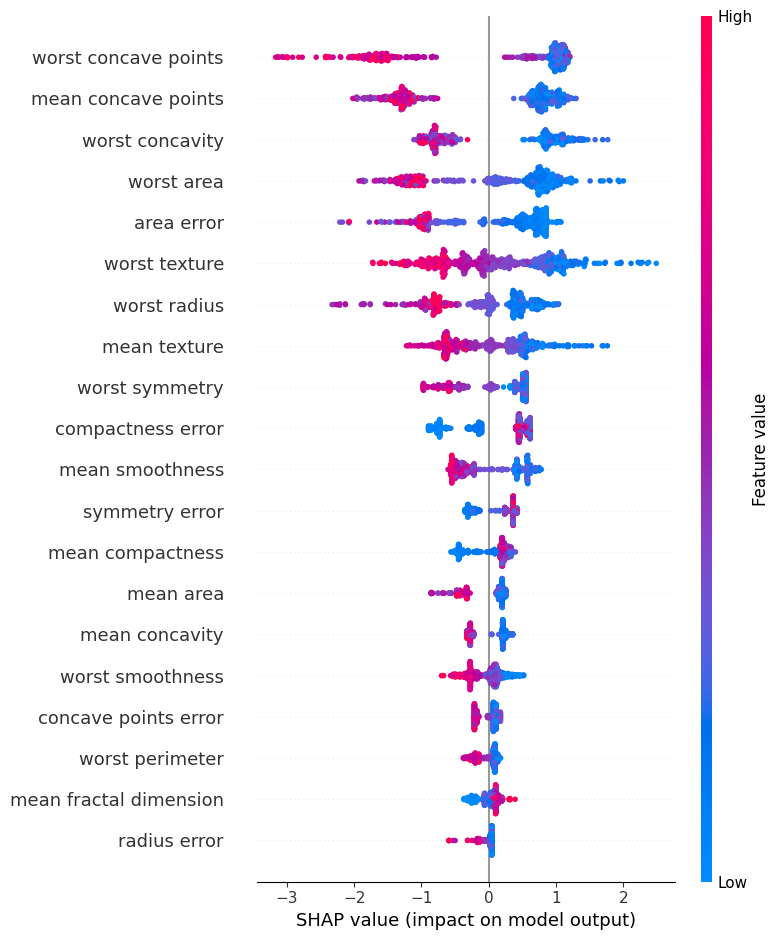

In [71]:
shap.summary_plot(shap_values, dataX)

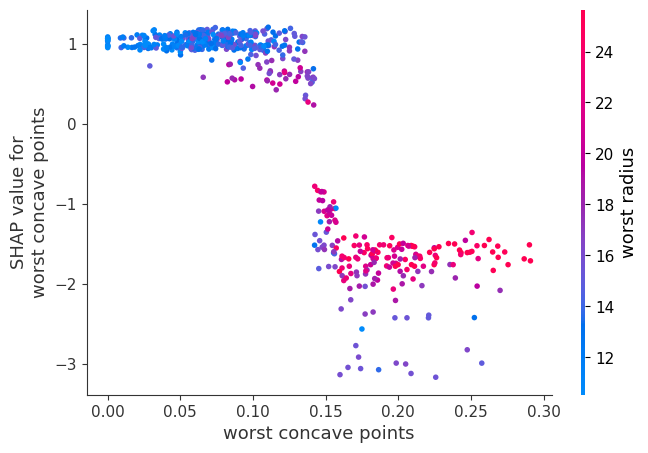

In [72]:
shap.dependence_plot("worst concave points", shap_values, dataX)

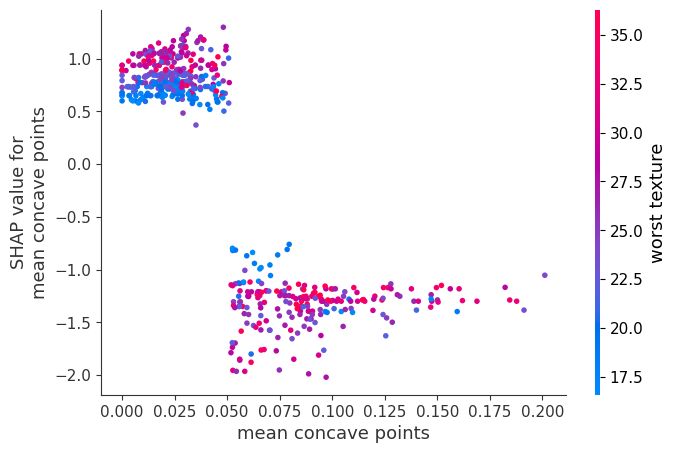

In [73]:
shap.dependence_plot("mean concave points", shap_values, dataX)

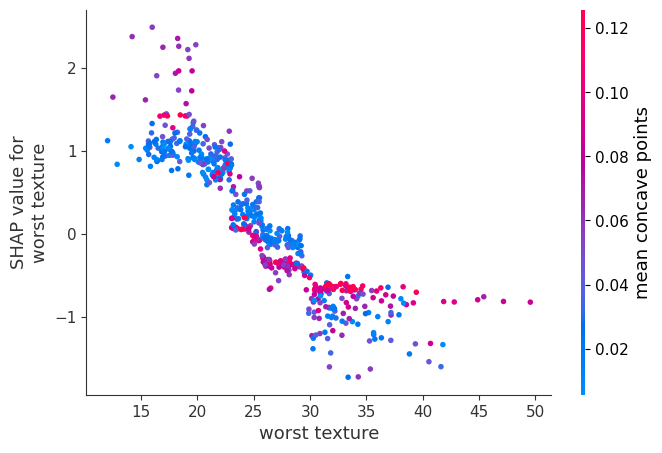

In [74]:
shap.dependence_plot("worst texture", shap_values, dataX)

## **3 - OTROS MODELOS SIMILARES:**
**Existen dos frameworks que compiten con XGBOOST, si bien no son tan conocidos**

**Estos modelos, dependiendo de la situación, pueden ser más ágiles o más robustos que XGBOOST**

**Por lo tanto, es importante tenerlos en mente como posibles alternativas**

### **CATBOOST:**

In [88]:
!pip install catboost

                                              0.0/101.0 MB ? eta -:--:--
                                              0.0/101.0 MB ? eta -:--:--
                                            0.0/101.0 MB 393.8 kB/s eta 0:04:17
                                              0.3/101.0 MB 2.5 MB/s eta 0:00:41
                                              1.0/101.0 MB 6.0 MB/s eta 0:00:17
                                              1.0/101.0 MB 6.0 MB/s eta 0:00:17
                                              1.0/101.0 MB 6.0 MB/s eta 0:00:17
                                              1.6/101.0 MB 5.1 MB/s eta 0:00:20
                                              2.1/101.0 MB 6.3 MB/s eta 0:00:16
                                              2.1/101.0 MB 6.3 MB/s eta 0:00:16
                                              2.1/101.0 MB 6.3 MB/s eta 0:00:16
     -                                        3.1/101.0 MB 6.5 MB/s eta 0:00:16
     -                                        3.1/101.

0.9790209790209791


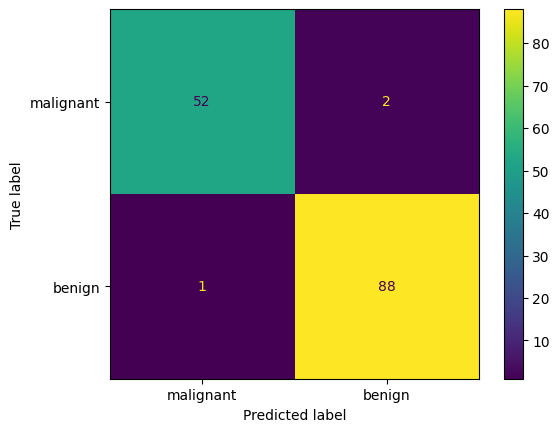

In [92]:
# Comparamos CatBoost con XGBoost:
from catboost import CatBoostClassifier
catboost_model = CatBoostClassifier(random_state=42, verbose=False)
catboost_model.fit(X_train, y_train)
y_pred = catboost_model.predict(X_test)
print(accuracy_score(y_test, y_pred))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred),
                          display_labels=cancer.target_names).plot();

0.965034965034965


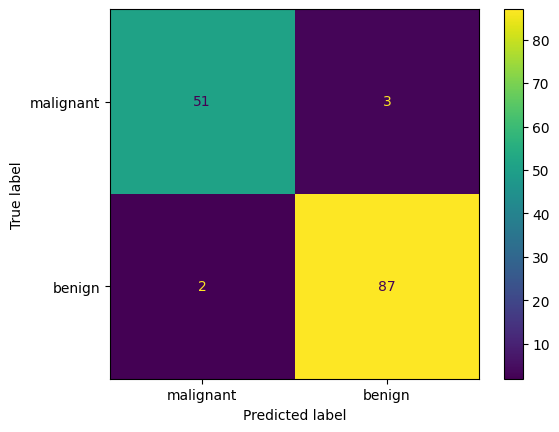

In [91]:
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
print(accuracy_score(y_test, y_pred))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred),
                            display_labels=cancer.target_names).plot();


### **LIGHTGBM:**

**Framework diseñado para tener gran agilidad y poder tratar multitud de datos**

**Soporta computación distribuida**

In [93]:
!pip install lightgbm
import lightgbm as lgb

                                              0.0/1.3 MB ? eta -:--:--
                                              0.0/1.3 MB ? eta -:--:--
                                              0.0/1.3 MB 640.0 kB/s eta 0:00:02
     -------                                  0.3/1.3 MB 2.6 MB/s eta 0:00:01
     ---------------------------------------- 1.3/1.3 MB 9.2 MB/s eta 0:00:00


[LightGBM] [Info] Number of positive: 268, number of negative: 158
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000319 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4272
[LightGBM] [Info] Number of data points in the train set: 426, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.629108 -> initscore=0.528392
[LightGBM] [Info] Start training from score 0.528392
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

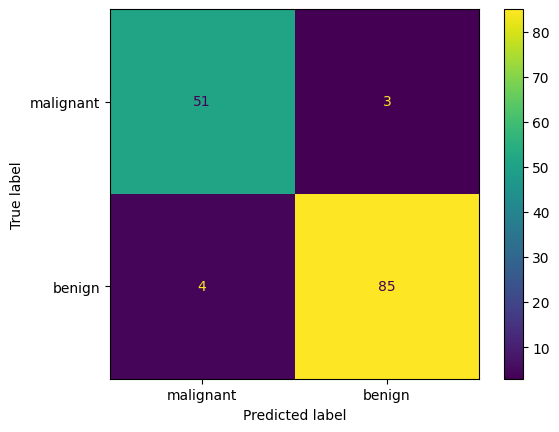

In [95]:
# Comparamos LightGBM con XGBoost:
lgb_model = lgb.LGBMClassifier(random_state=42, n_jobs=-1)
lgb_model.fit(X_train, y_train)
y_pred = lgb_model.predict(X_test)
print(accuracy_score(y_test, y_pred))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred),
                            display_labels=cancer.target_names).plot();